Installing Dependencies

In [110]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'myfolder')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [111]:
!pip install geopandas
!pip install descartes 

import geopandas as gpd

In [112]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [113]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [114]:
world = world.rename(columns={'name' : 'Countries'})

In [115]:
world.head()

,pop_est,continent,Countries,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [116]:
data = gpd.read_file("/content/exper.csv")

In [117]:
data.dtypes

Countries      object
Total          object
geometry     geometry
dtype: object

In [50]:
data['Total']

0     24%
1     17%
2     40%
3     81%
4     37%
     ... 
82    63%
83    19%
84    62%
85     6%
86    26%
Name: Total, Length: 87, dtype: object

In [51]:
data['Total'] = data['Total'].str.rstrip('%')

In [67]:
data['Total'] = data['Total'].astype('float32')


In [70]:

data.dropna()
data.head()


,Countries,Total
0,Algeria,24.0
1,Angola,17.0
2,Argentina,40.0
3,Armenia,81.0
4,Bangladesh,37.0


In [71]:
df  = world.merge(data, on='Countries', how='left')
gdf = gpd.GeoDataFrame(df)


In [73]:
gdf.head()
gdf.dropna()

,pop_est,continent,Countries,iso_a3,gdp_md_est,geometry,Total
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",19.0
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",19.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",40.0
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",86.0
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",13.0
...,...,...,...,...,...,...,...
166,865267,Africa,Djibouti,DJI,3345.0,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",6.0
168,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",0.0
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",94.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",82.0


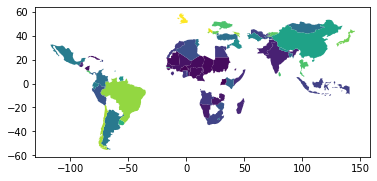

In [77]:
gdf = gdf[(world.pop_est>0) & (gdf.continent!="Antarctica")]
gdf.plot(column='Total');

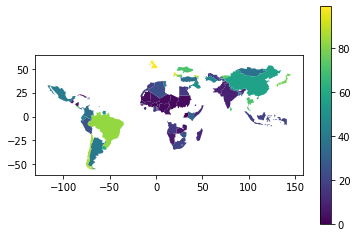

In [78]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Total', ax=ax, legend=True)

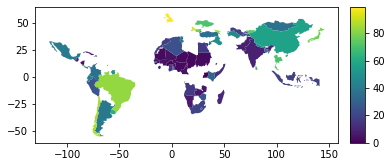

In [80]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(column='Total', ax=ax, legend=True, cax=cax)


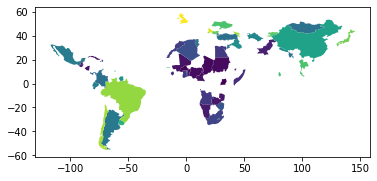

In [84]:
import numpy as np

gdf.loc[np.random.choice(gdf.index, 40), 'Total'] = np.nan

gdf.plot(column='Total');

In [90]:
!pip install mapclassify==2.4.2

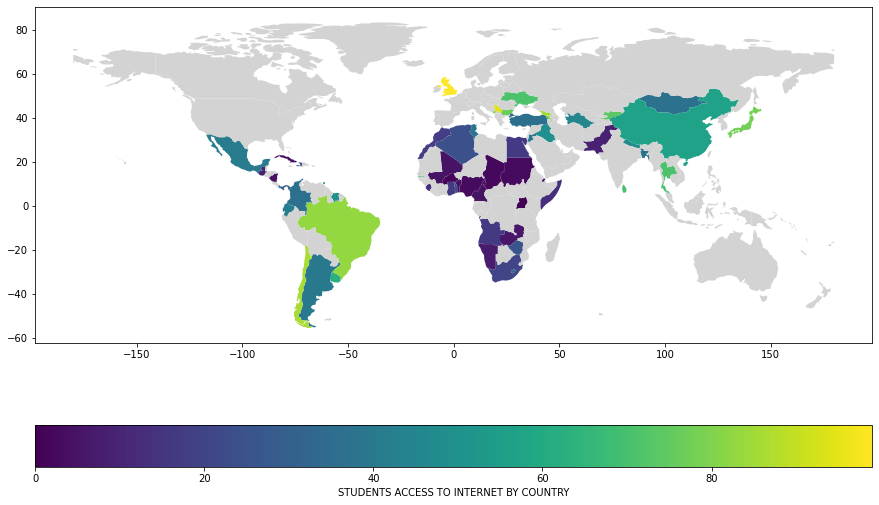

In [109]:
# Plot internet access with an accurate legend
fig, ax = plt.subplots(1, 1,figsize=(15, 10))
gdf.plot(column='Total',
            ax=ax,
            figsize=(15, 10),
            missing_kwds={'color': 'lightgrey','label': 'Missing values'},
            legend=True,
            legend_kwds={'label': "STUDENTS ACCESS TO INTERNET BY COUNTRY",
                         'orientation': "horizontal"})
            